## House Price Prediction and Analysis

#### 1. Introduction

##### 1.1 Background

The real estate market is an essential sector of the economy, significantly affecting individuals and businesses alike. Accurate
prediction of house prices can provide valuable insights for buyers, sellers, and investors. This project focuses on developing a
predictive model to estimate house prices based on various features and analyzing the factors influencing these prices.


##### 1.2 Project Overview

The objective of this project is to predict house prices using machine learning techniques and perform a detailed analysis of the
factors impacting house prices. The project involves preprocessing the data, exploring various features, engineering new features,
and building predictive models to forecast future house prices.


##### 1.3 Objectives

* To build and evaluate machine learning models for house price prediction.
* To explore and analyze the dataset to identify key features affecting house prices.
* To assess the performance of different models and select the most accurate one.
* To provide insights and recommendations based on the analysis

##### 1.4 Dataset Description

The dataset used in this project is sourced from Zameen.com, a leading real estate platform. The dataset includes comprehensive information about various properties listed on the website.

**Key Features in the Dataset:**
* **Location:** The location of the property, including city and province.
* **Area:** The size of the property in square feet or marla.
* **Price:** The listed price of the property.
* **Number of Bedrooms and Bathrooms:** Information about the number of bedrooms and bathrooms in the property.
* **Property Type:** The type of property (e.g., apartment, house). 
* **Purpose:** The intended use of the property (e.g., sale, rent).
* **Date Added:** When the property was listed.

This data will be used to train and evaluate machine learning models for predicting house prices and to analyze the factors affecting
these prices. The dataset will be explored to understand its structure and to uncover insights that will help in building accurate
predictive models.


##### 1.5 Methodology

The project follows a structured approach:

**1. Data Preprocessing:** Cleaning and preparing the data for analysis.   
**2. Exploratory Data Analysis (EDA):** Understanding the data distribution and identifying patterns.      
**3. Feature Engineering:** Creating and selecting relevant features for model training.       
**4. Encoding Categorical Variables:** Converting categorical data into numerical format.      
**5. Outlier Analysis:** Identifying and handling outliers in the data.    
**6. Model Building:** Training and evaluating various machine learning models.  
**7. Results and Analysis:** Comparing model performances and deriving insights.    

This structured approach ensures that each aspect of the project is thoroughly addressed, leading to a comprehensive
understanding and accurate prediction of house prices.


#### 2. Data Preprocessing

##### 2.1 Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

##### 2.2 Read and Explore Data

In [2]:
df = pd.read_csv('zameen-updated.csv')

In [3]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [4]:
df.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category'],
      dtype='object')

In [5]:
df.shape

(168446, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [7]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


##### 2.3 Data Cleaning

2.3.1 Data Convertion
- Convert 'date_added' Column to datetime Format


In [8]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [9]:
df.dtypes

property_id               int64
location_id               int64
page_url                 object
property_type            object
price                     int64
location                 object
city                     object
province_name            object
latitude                float64
longitude               float64
baths                     int64
area                     object
purpose                  object
bedrooms                  int64
date_added       datetime64[ns]
agency                   object
agent                    object
Area Type                object
Area Size               float64
Area Category            object
dtype: object

2.3.2 Standardize 'area' Column
- Since the 'area' column contains values in both Marla and Kanal units, standardize this column by converting all values to a
single format(marla) to ensure consistency. Create a new column area_in_marla and populate it with the converted values

- Unique Values:

In [10]:
unique_values_counts = df['area'].value_counts()
# Display only the top 5 unique values and their counts
print("Unique Values and Their Counts (Top 5):")
print(unique_values_counts.head(5))

Unique Values and Their Counts (Top 5):
area
1 Kanal     20061
5 Marla     19963
10 Marla    17384
8 Marla     10126
4 Marla      6705
Name: count, dtype: int64


- Conversion:

In [11]:
def extract_area_info(area_str):
    """Extracts numeric value and unit from an area string, handling commas and decimal points."""
    if pd.isnull(area_str):
        return np.nan, np.nan

 # Remove commas and split by space
    area_str = area_str.replace(',', '')
    parts = area_str.split()

    if len(parts) == 2:
        value, unit = parts
        try:
            return float(value), unit
        except ValueError:
# Handle invalid numeric format
            print(f"Warning: Invalid numeric format in '{area_str}'.")
            return np.nan, np.nan
    else:
# Handle cases with unexpected formats
        print(f"Warning: Unexpected format in '{area_str}'.")
        return np.nan, np.nan
# Extract numeric part and unit
df[['area_value', 'area_unit']] = df['area'].apply(extract_area_info).apply(pd.Series)
print("Extraction completed.")


Extraction completed.


In [12]:
# Conversion factor (assuming 20 Marla in a Kanal)
CONVERSION_FACTOR = {'Kanal': 20}
def convert_to_marla(row):
    """Converts area value to Marla, handling known units."""
    value = row['area_value']
    unit = row['area_unit']
    if unit in CONVERSION_FACTOR:
        return value * CONVERSION_FACTOR[unit]
    else:
# Handle unknown units without printing warnings
        return value  
# Convert Kanal to Marla
df['area_in_marla'] = df.apply(convert_to_marla, axis=1)
print("Conversion to Marla completed.")

Conversion to Marla completed.


In [13]:
# Drop intermediate columns
df = df.drop(columns=['area_value', 'area_unit'])

In [14]:
# Verify the changes
print(df[['area', 'area_in_marla']].head())

        area  area_in_marla
0    4 Marla            4.0
1  5.6 Marla            5.6
2    8 Marla            8.0
3    2 Kanal           40.0
4    8 Marla            8.0


2.3.3 Data Validation
- The initial data summary showed that some critical columns have minimum values of zero, which may indicate missing or
erroneous data. Therefore, it's crucial to validate and handle these zero values.


In [15]:
def validate_and_filter_data(df):
 # Apply filters to keep only valid rows
    valid_df = df[
        (df['baths'] > 0) &
        (df['bedrooms'] > 0) &
        (df['area_in_marla'] > 0) &
        df['latitude'].between(-90, 90) &
        df['longitude'].between(-180, 180)
 ]

    return valid_df

In [16]:
# Run the validation and filtering
filtered_df = validate_and_filter_data(df)

2.3.4 Remove Unnecessary Columns
- Drop columns that are redundant or irrelevant for the analysis, such as 'page_url', 'Area Type', 'Area Size', 'Area Category', and
'area', as their information is already included in the 'area_in_marla' column.


In [17]:
#Drop the redundant columns:
filtered_df = filtered_df.drop(columns=['Area Type', 'Area Size', 'Area Category', 'page_url', 'area'])

In [18]:
print(filtered_df.columns)

Index(['property_id', 'location_id', 'property_type', 'price', 'location',
       'city', 'province_name', 'latitude', 'longitude', 'baths', 'purpose',
       'bedrooms', 'date_added', 'agency', 'agent', 'area_in_marla'],
      dtype='object')


In [19]:
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.expand_frame_repr', False) # Disable line wrapping

2.3.5 Remove Duplicate Data
- Identify and remove any duplicate rows in the dataset to ensure data integrity

In [20]:
# Identify the number of duplicate rows
num_duplicates = filtered_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
# Remove duplicate rows
filtered_df = filtered_df.drop_duplicates()
# Verify the shape of the DataFrame after removing duplicates
print("Shape of DataFrame after removing duplicates:", filtered_df.shape)


Number of duplicate rows: 0
Shape of DataFrame after removing duplicates: (125613, 16)


2.3.6 Handle Missing Values
- Identify and handle missing values in the dataset by imputing 'agent' and 'agency' columns to ensure data completeness

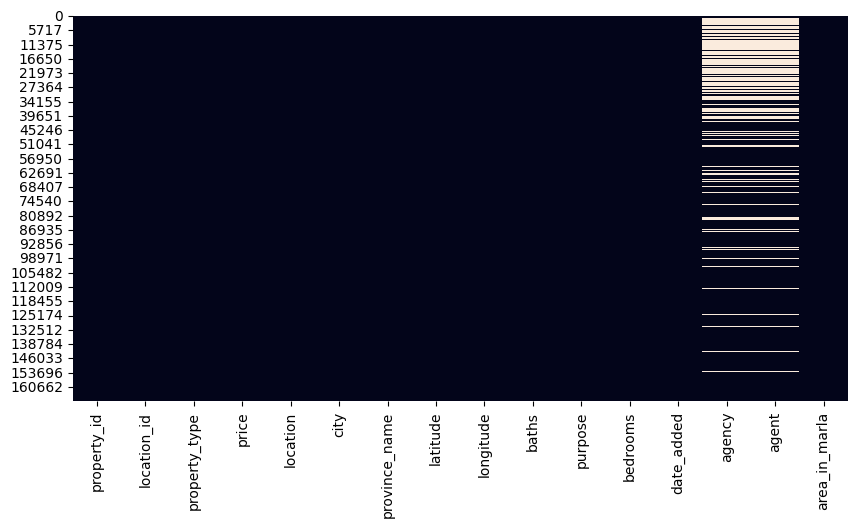

In [21]:
plt.figure(figsize=(10, 5))
sns.heatmap(filtered_df.isnull(), cbar = False)
plt.show()

In [22]:
missing_percentage = (filtered_df.isnull().sum() / len(filtered_df) * 100).round(2)
missing_percentage

property_id       0.00
location_id       0.00
property_type     0.00
price             0.00
location          0.00
city              0.00
province_name     0.00
latitude          0.00
longitude         0.00
baths             0.00
purpose           0.00
bedrooms          0.00
date_added        0.00
agency           29.49
agent            29.49
area_in_marla     0.00
dtype: float64

In [23]:
# Impute missing values in 'agency' with the mode value
filtered_df['agency'] = filtered_df['agency'].fillna(filtered_df['agency'].mode()[0])
# Impute missing values in 'agent' with the mode value
filtered_df['agent'] = filtered_df['agent'].fillna(filtered_df['agent'].mode()[0])

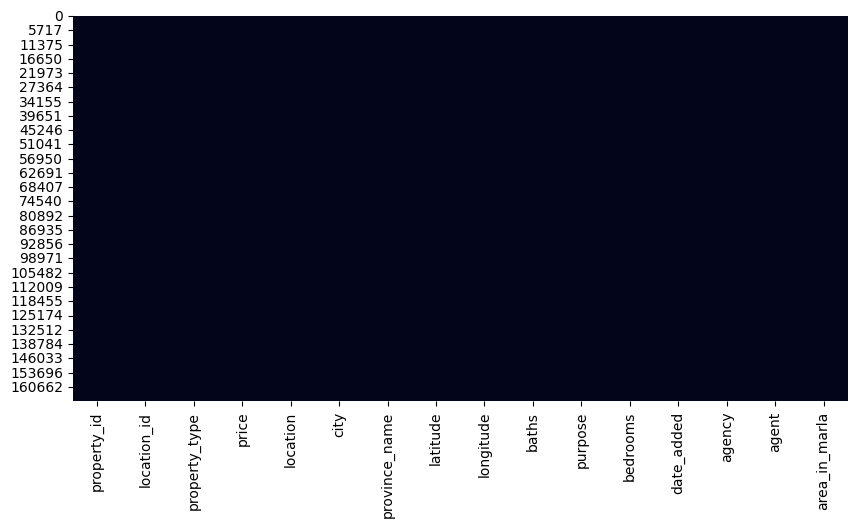

In [24]:
plt.figure(figsize=(10, 5))
sns.heatmap(filtered_df.isnull(), cbar = False)
plt.show()

2.3.7 Identify and Remove Outliers
- Detect and handle outliers in numerical columns such as price , area_in_marla , baths , and bedrooms . This can be
done using statistical methods or visualization techniques.


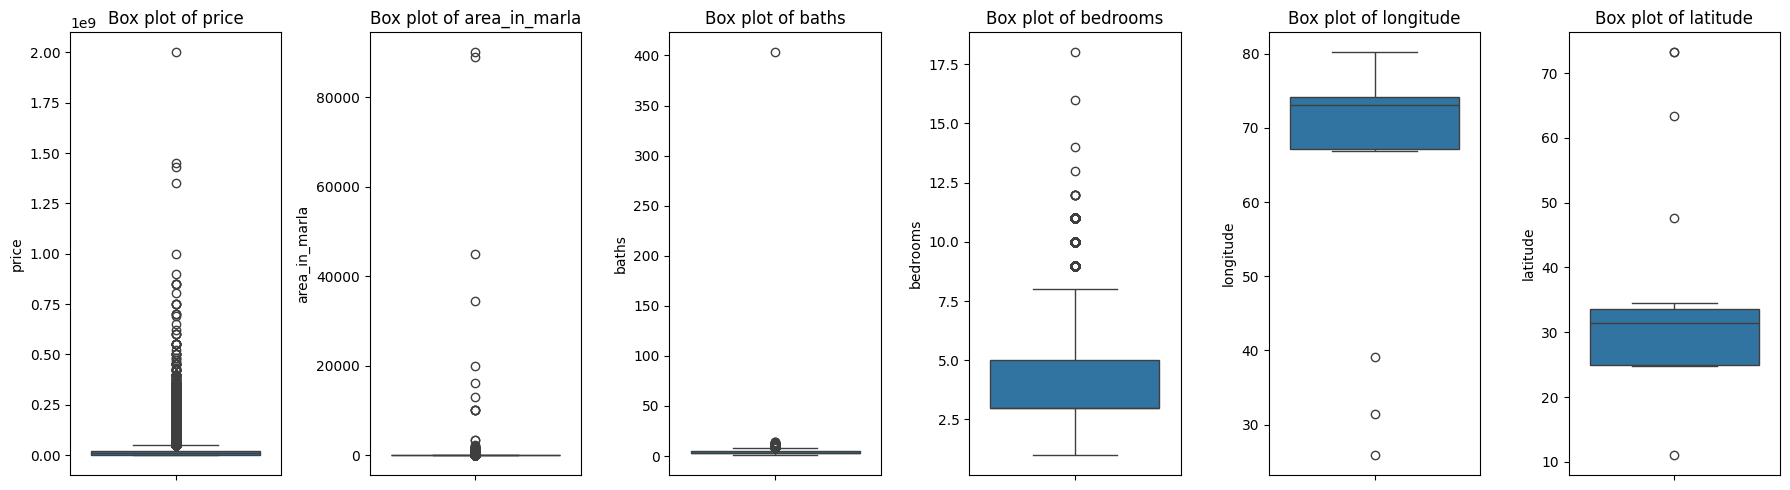

In [25]:
# List of numerical features including longitude and latitude
numerical_features = ['price', 'area_in_marla', 'baths', 'bedrooms', 'longitude', 'latitude']
# Plot box plots with a smaller figure size 
plt.figure(figsize=(18, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(y=filtered_df[feature])
    plt.title(f'Box plot of {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

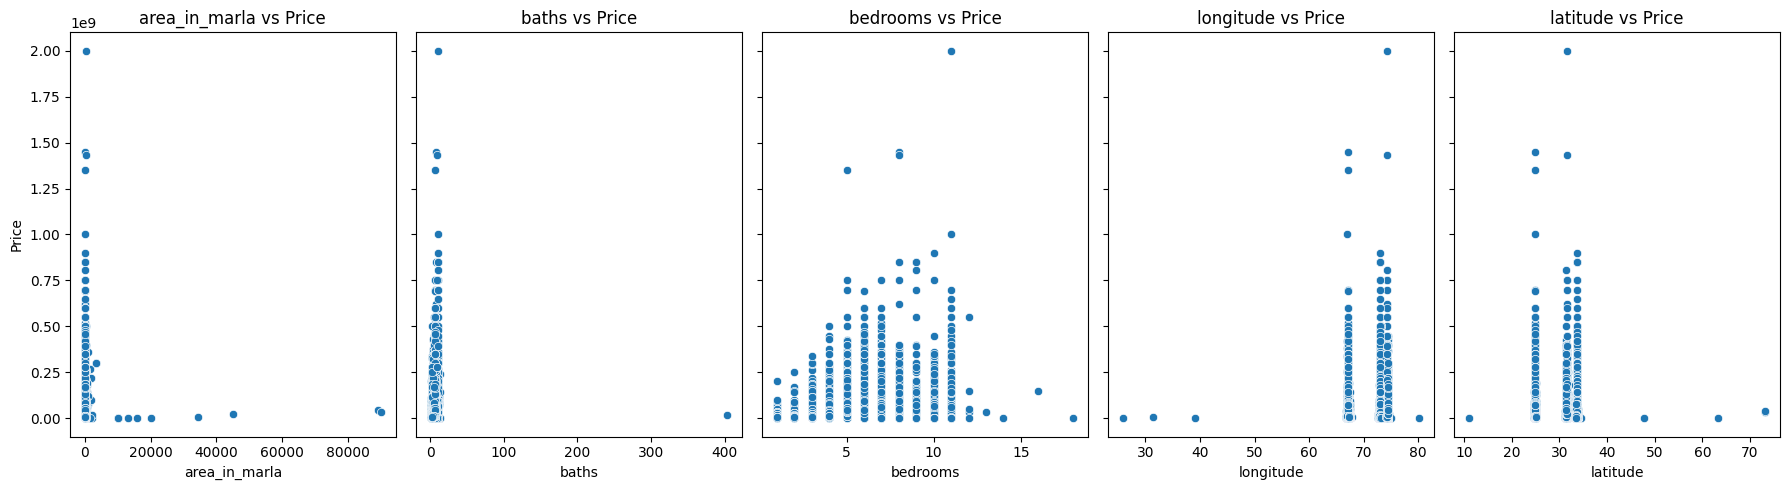

In [26]:
# List of numerical columns to plot against 'price'
numerical_columns = ['area_in_marla', 'baths', 'bedrooms', 'longitude', 'latitude']
# Create subplots
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(18, 5), sharey=True)
# Create scatter plots for each numerical column vs. price
for i, column in enumerate(numerical_columns):
    sns.scatterplot(x=column, y='price', data=filtered_df, ax=axes[i])
    axes[i].set(title=f'{column} vs Price', xlabel=column, ylabel='Price' if i == 0 else '')
# Adjust layout
plt.tight_layout()
plt.show()

In [27]:
# Define a function to identify outliers based on the IQR method for a given feature
def identify_outliers(filtered_df, feature):
    Q1 = filtered_df[feature].quantile(0.25)
    Q3 = filtered_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = filtered_df[(filtered_df[feature] < lower_bound) | (filtered_df[feature] > upper_bound)]
    return outliers
# List of features to check for outliers
features = ['price', 'area_in_marla', 'baths', 'bedrooms', 'longitude', 'latitude']
# Identify and print outliers for each feature
for feature in features:
    outliers = identify_outliers(filtered_df, feature)
    print(f"Number of {feature} outliers: {outliers.shape[0]}")

Number of price outliers: 9928
Number of area_in_marla outliers: 6687
Number of baths outliers: 1563
Number of bedrooms outliers: 1496
Number of longitude outliers: 3
Number of latitude outliers: 5


In [28]:
# Define the function to identify and remove outliers using the IQR method for multiple features
def remove_outliers(filtered_df, features): 
    for feature in features:
        Q1 = filtered_df[feature].quantile(0.25)
        Q3 = filtered_df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_df = filtered_df[(filtered_df[feature] >= lower_bound) & (filtered_df[feature] <= upper_bound)]
    return filtered_df
# List of features to remove outliers from
features = ['price', 'area_in_marla', 'baths', 'bedrooms', 'longitude', 'latitude']
# Remove outliers for the specified features
df_clean = remove_outliers(filtered_df, features)
# Verify the number of rows after removing outliers
print(f"Number of rows after removing outliers: {df_clean.shape[0]}")
# Optionally, you can print the number of rows removed for each feature
initial_rows = filtered_df.shape[0]
final_rows = df_clean.shape[0]
print(f"Total rows removed: {initial_rows - final_rows}")


Number of rows after removing outliers: 98067
Total rows removed: 27546


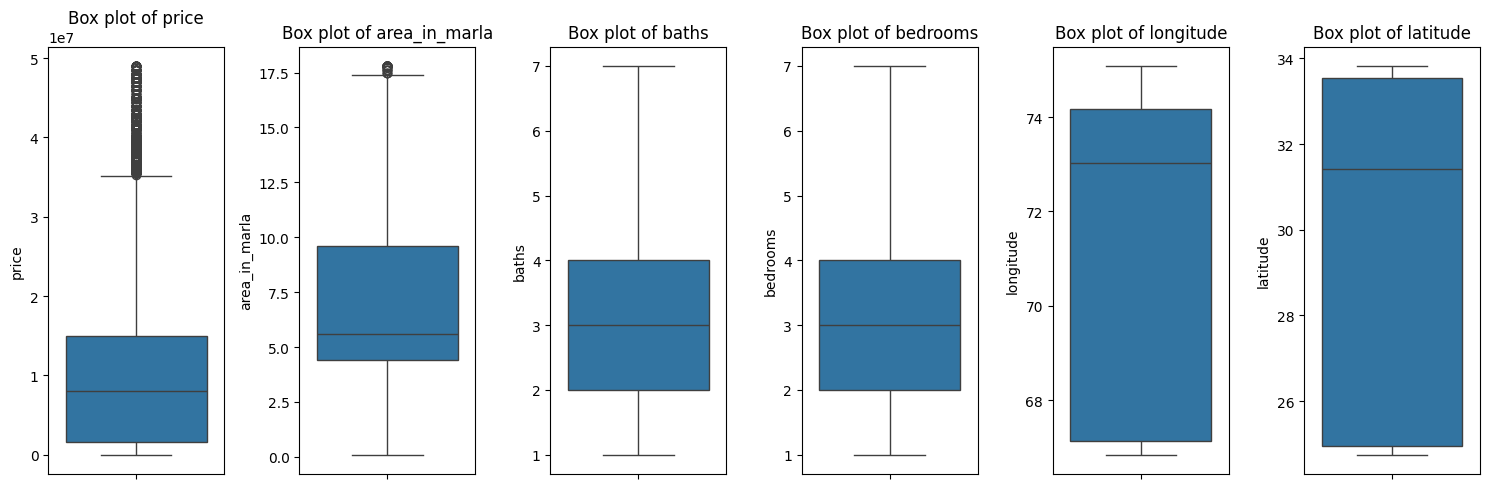

In [29]:
# List of features to create box plots for
features = ['price', 'area_in_marla', 'baths', 'bedrooms', 'longitude', 'latitude']
# Create subplots
fig, axes = plt.subplots(1, len(features), figsize=(15, 5))
# Create box plots for each feature
for i, feature in enumerate(features):
    sns.boxplot(y=df_clean[feature], ax=axes[i])
    axes[i].set_title(f'Box plot of {feature}')
    axes[i].set_ylabel(feature) # Set y-label for each subplot
# Adjust layout
plt.tight_layout()
plt.show() 

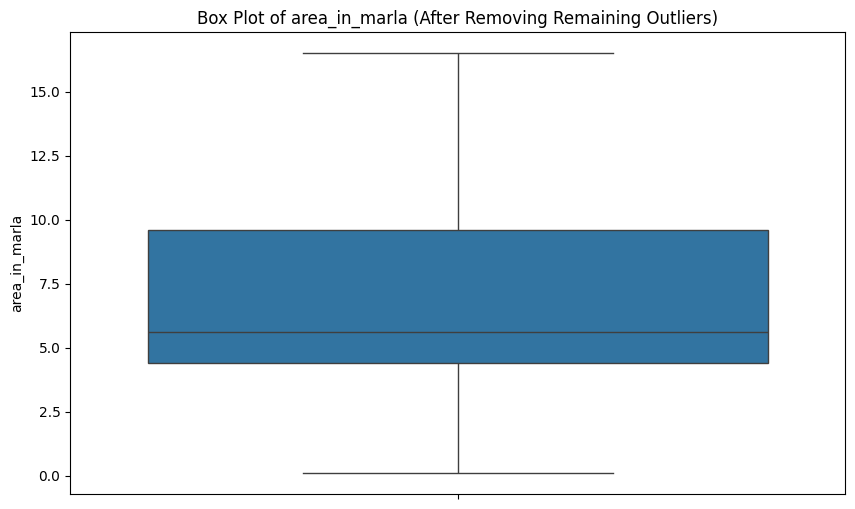

Shape of original dataset: (98067, 16)
Shape of cleaned dataset after removing remaining outliers: (97722, 16)


In [30]:
# Remove outliers for 'area_in_marla' by setting an upper threshold
upper_threshold = 16.5
df_cleaned = df_clean[df_clean['area_in_marla'] <= upper_threshold]
# Plot box plot again to check
plt.figure(figsize=(10, 6))
sns.boxplot(df_cleaned['area_in_marla'])
plt.title('Box Plot of area_in_marla (After Removing Remaining Outliers)')
plt.show()
# Verify the number of removed outliers
print(f"Shape of original dataset: {df_clean.shape}")
print(f"Shape of cleaned dataset after removing remaining outliers: {df_cleaned.shape}")

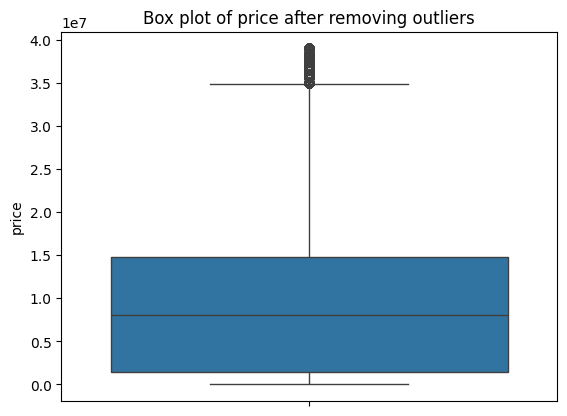

In [31]:
# Calculate z-scores
z_scores = stats.zscore(df_cleaned['price'])
# Set a threshold (e.g., 3 standard deviations)
threshold = 3
# Filter out the outliers
df_cleaned = df_cleaned[(z_scores < threshold) & (z_scores > -threshold)] 
# Plot to visualize
sns.boxplot(y=df_cleaned['price'])
plt.title('Box plot of price after removing outliers')
plt.ylabel('price')
plt.show()

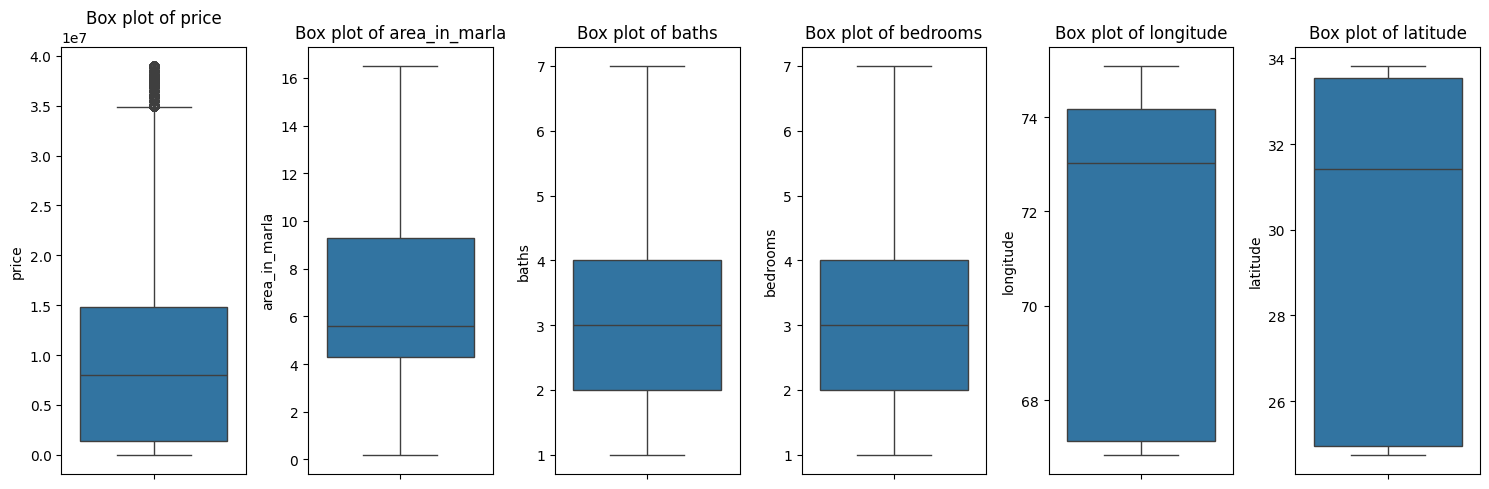

In [32]:
# List of features to create box plots for
features = ['price', 'area_in_marla', 'baths', 'bedrooms', 'longitude', 'latitude']
# Create subplots
fig, axes = plt.subplots(1, len(features), figsize=(15, 5))
# Create box plots for each feature
for i, feature in enumerate(features):
    sns.boxplot(y=df_cleaned[feature], ax=axes[i])
    axes[i].set_title(f'Box plot of {feature}')
    axes[i].set_ylabel(feature) # Set y-label for each subplot
 # Adjust layout
plt.tight_layout()
plt.show()

#### 3. Exploratory Data Analysis (EDA)

##### 3.1 Descriptive Statistics
Provides a summary of the dataset's central tendencies, dispersion, and shape of the distribution of numerical features. Includes
measures such as mean, median, standard deviation, and quartiles for each numerical column.

In [33]:

df_cleaned.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,date_added,area_in_marla
count,9.625700e+04,96257.000000,9.625700e+04,96257.000000,96257.000000,96257.000000,96257.000000,96257,96257.000000
mean,1.545585e+07,4853.511828,9.617528e+06,29.537825,71.019524,3.327207,3.206156,2019-05-16 15:32:21.839035136,6.572550
min,2.370620e+05,1.000000,1.000000e+00,24.749425,66.842040,1.000000,1.000000,2018-08-05 00:00:00,0.200000
25%,1.461013e+07,1356.000000,1.400000e+06,24.946375,67.129961,2.000000,2.000000,2019-05-04 00:00:00,4.300000
50%,1.649895e+07,3731.000000,8.000000e+06,31.430421,73.023752,3.000000,3.000000,2019-06-26 00:00:00,5.600000
75%,1.705434e+07,8484.000000,1.480000e+07,33.550407,74.173720,4.000000,4.000000,2019-07-04 00:00:00,9.300000
max,1.735765e+07,14220.000000,3.900000e+07,33.824600,75.084804,7.000000,7.000000,2019-07-18 00:00:00,16.500000
std,2.294765e+06,3845.811930,8.853338e+06,3.846855,3.207535,1.414002,1.230166,NaN,3.079384


##### 3.2 Data Visualization

3.2.1 Histogram of Numerical Columns
- Plots the distribution of numerical features like price , bedrooms , baths , longitude , latitude , and area_in_marla
to observe their frequency distribution.


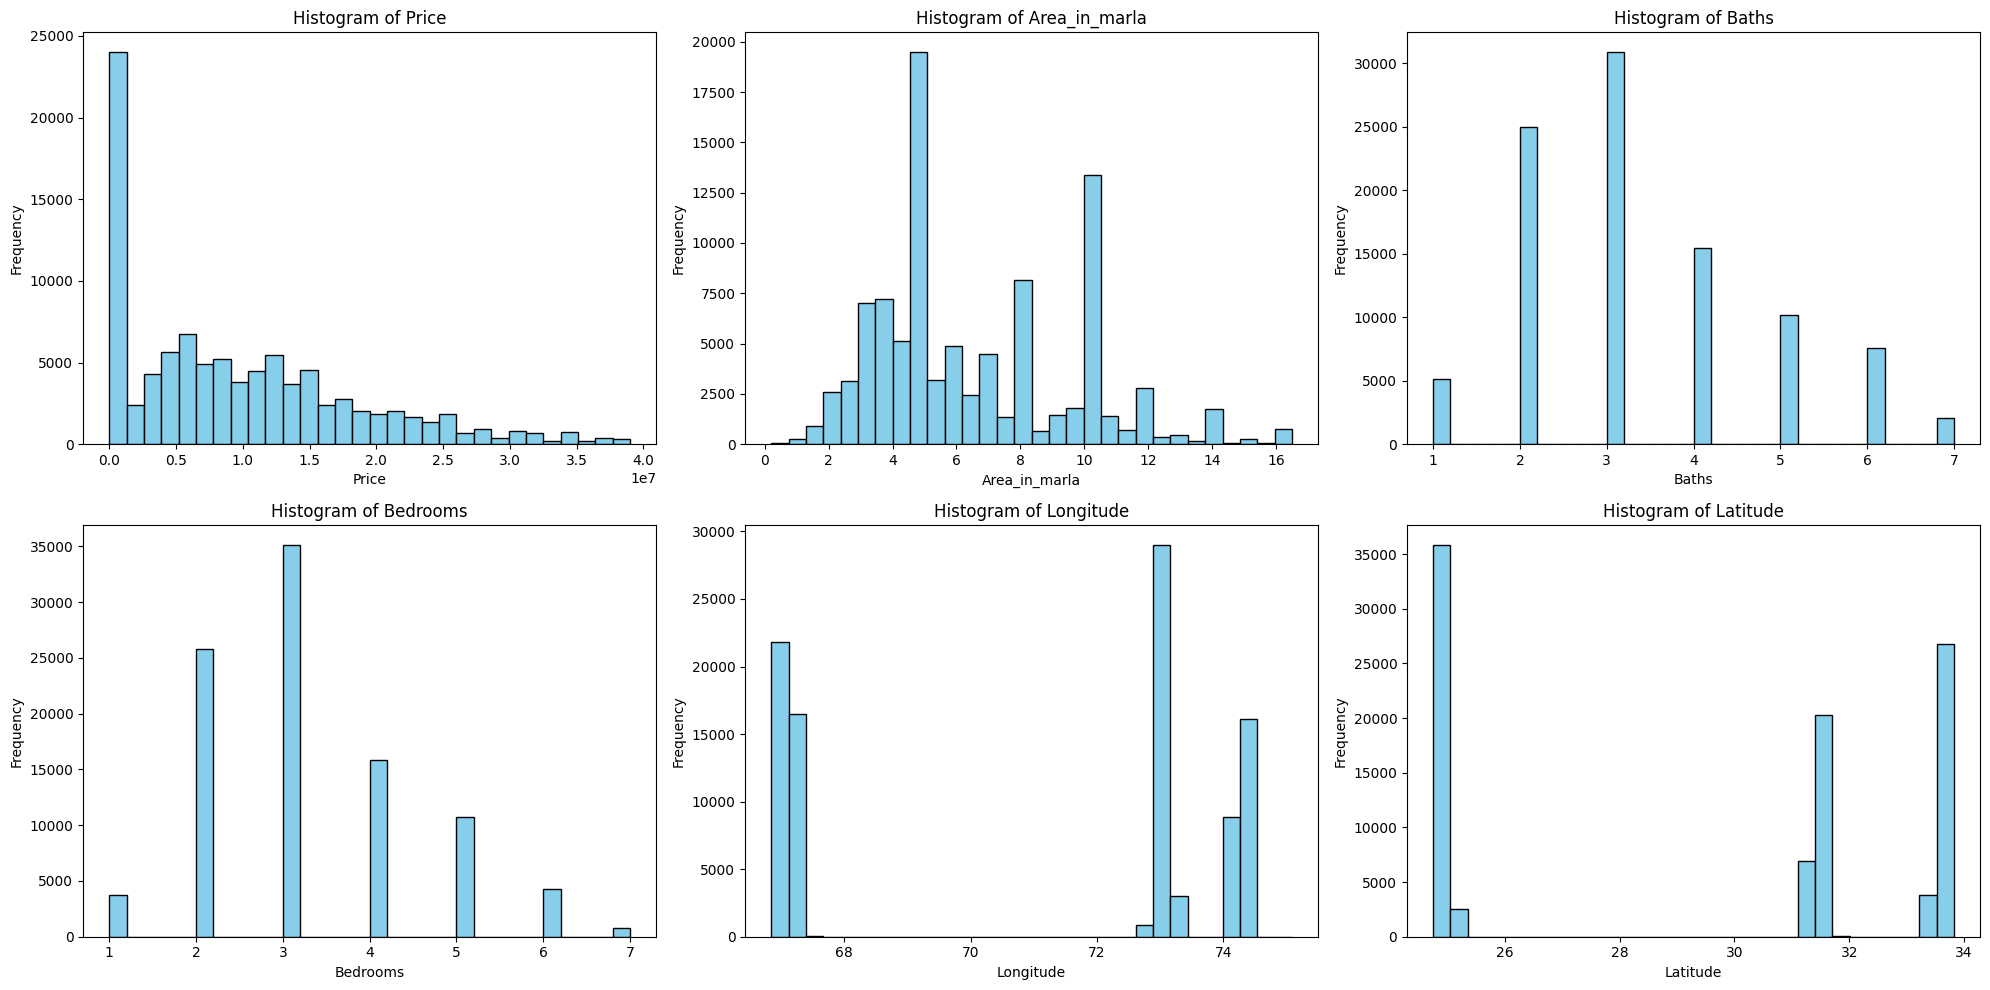

In [34]:
# List of numerical features
numerical_features = ['price', 'area_in_marla', 'baths', 'bedrooms', 'longitude', 'latitude']
# Determine the number of rows and columns for subplots
num_features = len(numerical_features)
num_cols = 3 # Adjust this to control the number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols # Calculate number of rows needed
# Create subplots 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
# Plot histograms for each feature
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].hist(df_cleaned[feature], bins=30, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Histogram of {feature.capitalize()}')
    axes[row, col].set_xlabel(feature.capitalize())
    axes[row, col].set_ylabel('Frequency')
# Adjust layout
plt.tight_layout()
plt.show()

3.2.2 Scatter Plot of Price Against Numerical Columns
- Visualizes the relationship between price and numerical columns such as bedrooms , baths , longitude , latitude ,
and area_in_marla to identify any patterns or correlations.


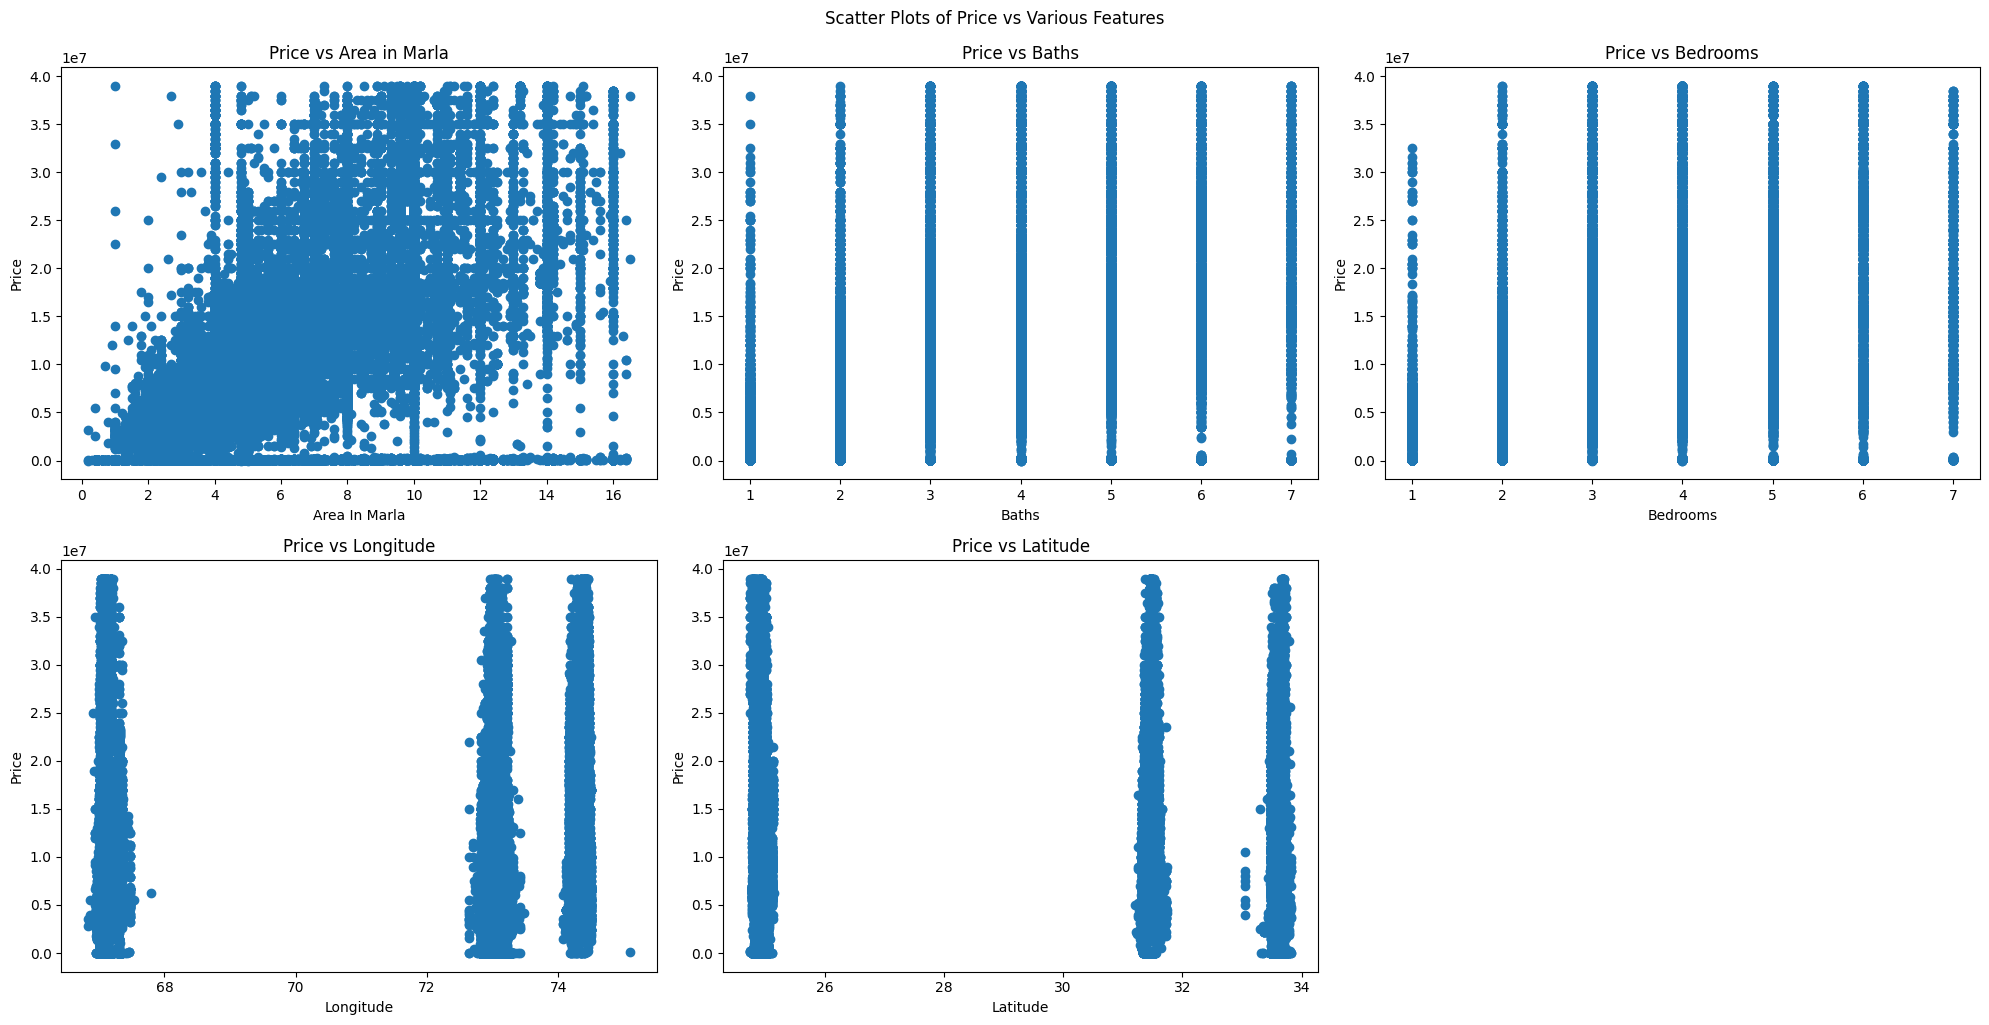

In [35]:
# Define the plots and their titles
plots = {
 'area_in_marla': 'Price vs Area in Marla',
 'baths': 'Price vs Baths',
 'bedrooms': 'Price vs Bedrooms',
 'longitude': 'Price vs Longitude',
 'latitude': 'Price vs Latitude'
}
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# Plot each scatter plot
for (i, (col, title)) in enumerate(plots.items()):
    row, col_idx = divmod(i, 3)
    axs[row, col_idx].scatter(df_cleaned[col], df_cleaned['price'])
    axs[row, col_idx].set_xlabel(col.replace('_', ' ').title())
    axs[row, col_idx].set_ylabel('Price')
    axs[row, col_idx].set_title(title)
# Hide the empty subplot (bottom-right corner)
axs[1, 2].axis('off')
# Adjust layout
plt.tight_layout()
plt.suptitle('Scatter Plots of Price vs Various Features', y=1.02)
# Show plot
plt.show()


3.2.3 Bar Plot of Price Against Categorical Columns
- Compares the average price for different categories within categorical columns like property_type , location , city ,
province_name , purpose , agency , and agent to understand how these categories impact house prices.


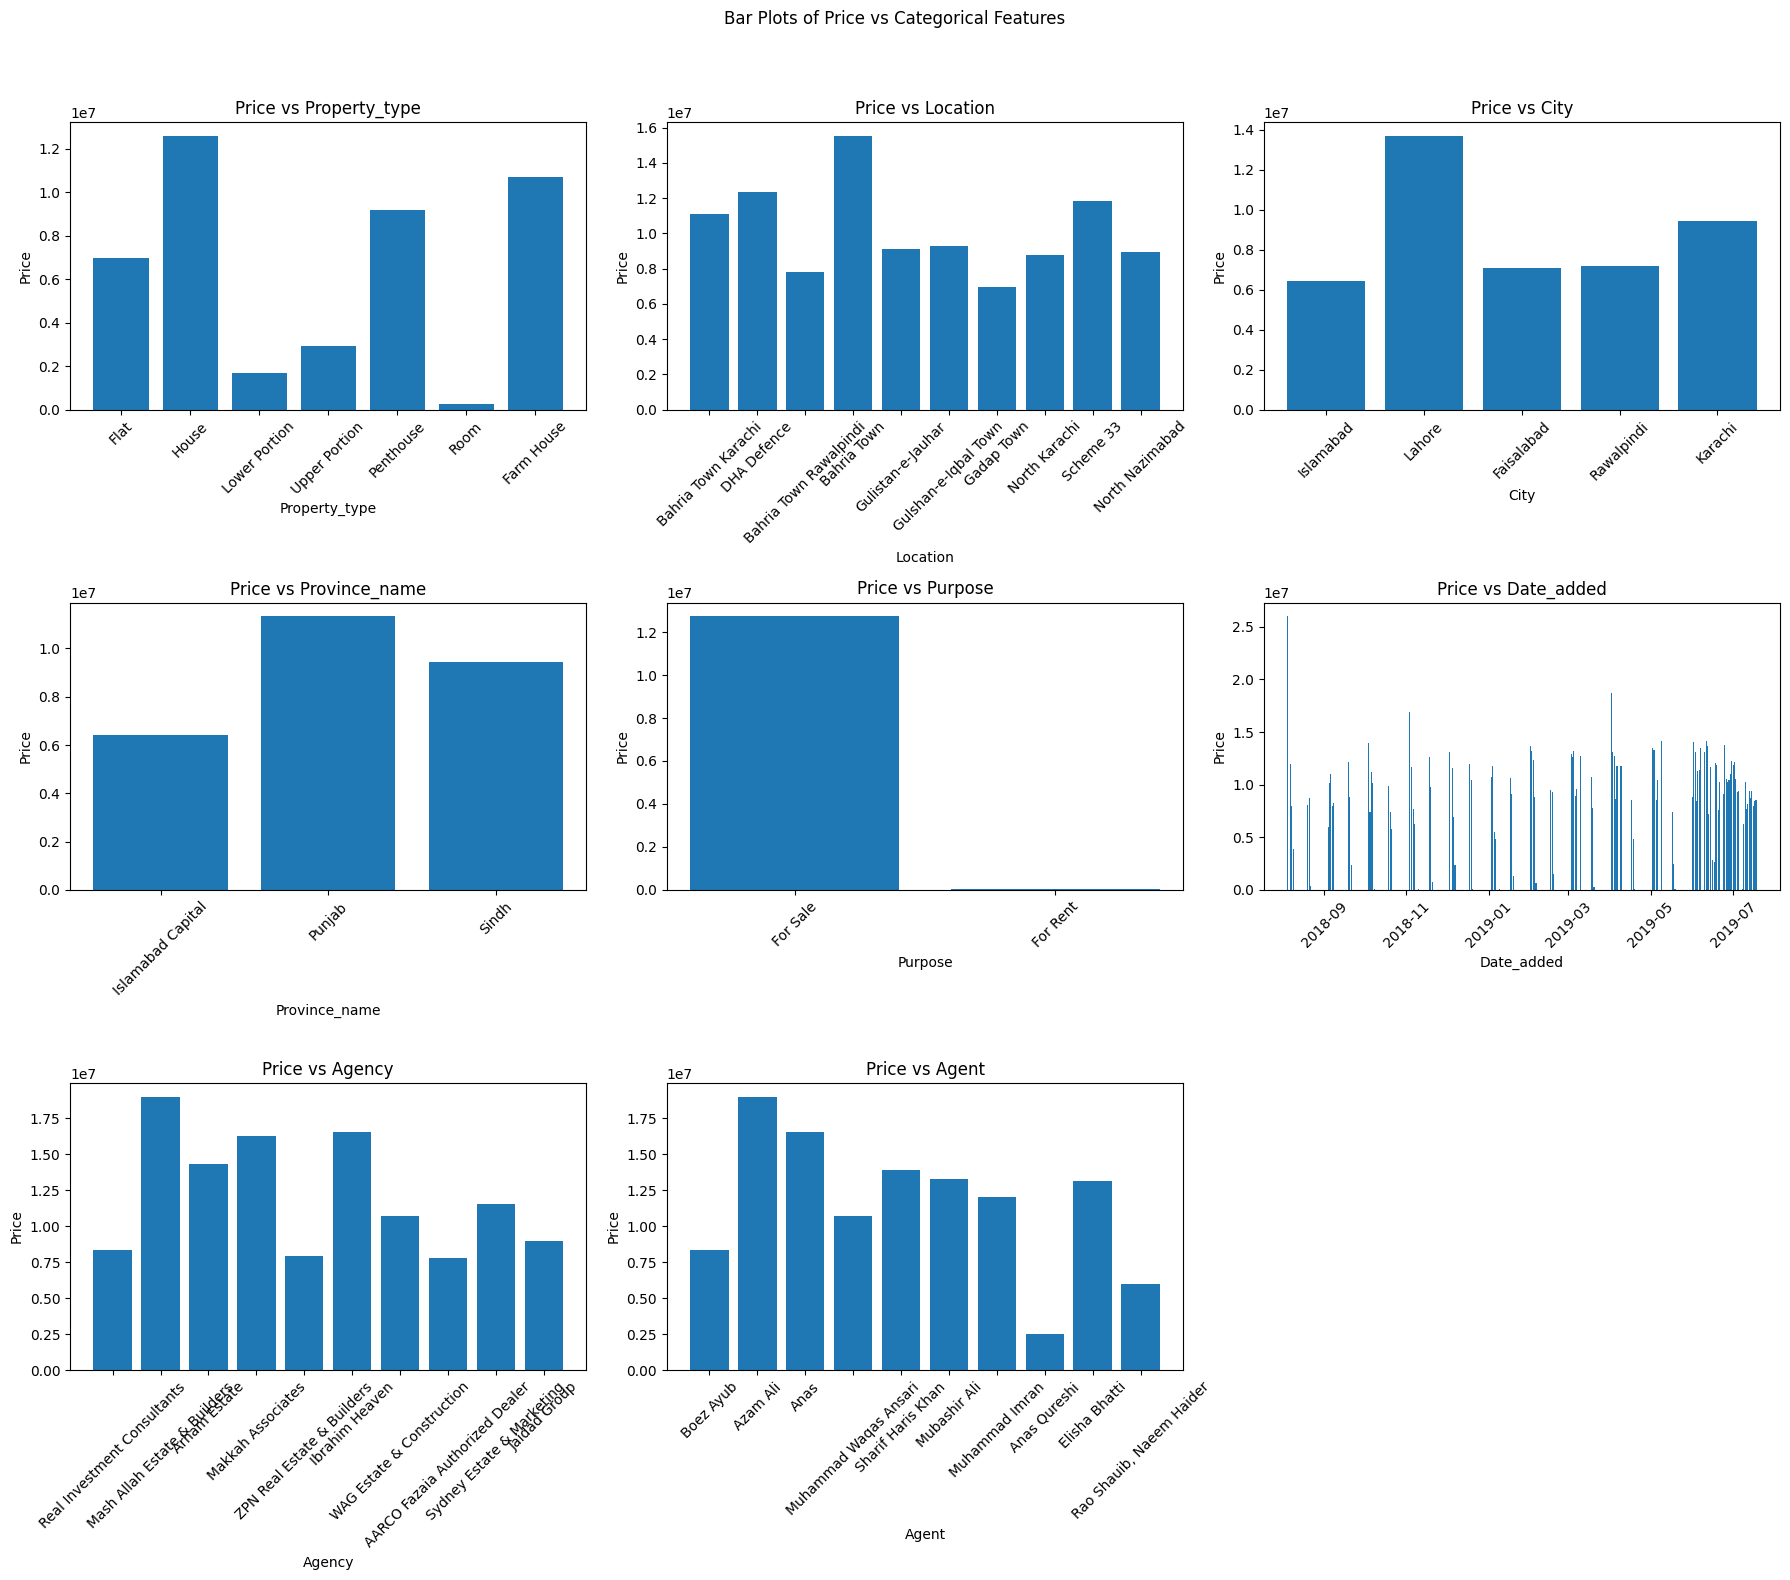

In [36]:
# Define categorical features
categorical_features = ['property_type', 'location', 'city', 'province_name', 'purpose', 'date_added', 'agency', 'agent']

# Set up subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(categorical_features):
    ax = axes[i]
    
    # Top 10 categories for certain features
    if feature in ['location', 'agency', 'agent']:
        top_categories = df_cleaned[feature].value_counts().nlargest(10).index
    else:
        top_categories = df_cleaned[feature].unique()
    
    # Calculate mean price for each category
    category_price_means = (
        df_cleaned[df_cleaned[feature].isin(top_categories)]
        .groupby(feature)['price']
        .mean()
        .loc[top_categories]
    )
    
    # Plot bar chart
    ax.bar(category_price_means.index, category_price_means.values)
    ax.set(title=f'Price vs {feature.capitalize()}', xlabel=feature.capitalize(), ylabel='Price')
    ax.tick_params(axis='x', rotation=45)

# Hide any remaining empty subplots
for j in range(len(categorical_features), len(axes)):
    axes[j].axis('off')

# Layout adjustments
plt.tight_layout()
plt.suptitle("Bar Plots of Price vs Categorical Features", y=1.05)
plt.show()

##### 3.3 Correlation Analysis
* **Calculate Correlations:** Compute and analyze the correlation matrix for all numerical columns to understand relationships
between features.


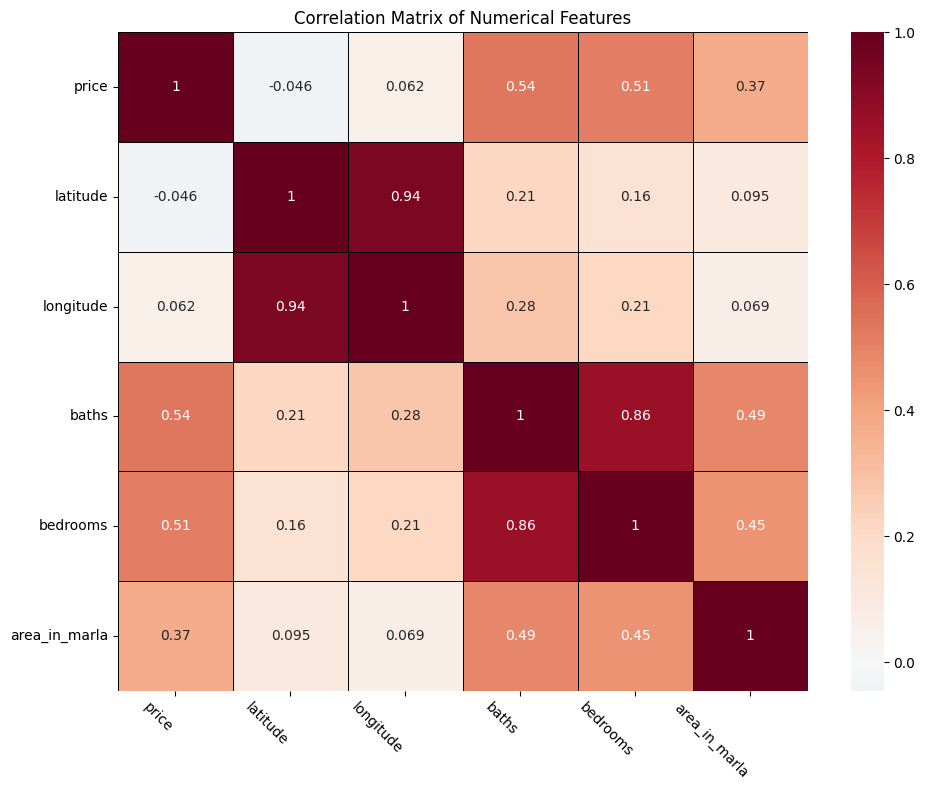

In [37]:
# Compute the correlation matrix
correlation_matrix = df_cleaned[['price', 'latitude', 'longitude', 'baths', 'bedrooms', 'area_in_marla']].corr()
# Plotting the correlation matrix using Seaborn and Matplotlib
plt.figure(figsize=(10, 8))
# Create the heatmap
sns.heatmap(correlation_matrix,
    annot=True, # Display the correlation coefficients
    cmap='RdBu_r', # Color map
    center=0, # Center the color map at 0
    linewidths=0.5, # Width of lines that will divide each cell
    linecolor='black') # Color of lines that will divide each cell
# Customize the plot
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=-45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### 4. Feature Engineering

##### 4.1 Add Price Per Marla
- Create a new feature representing the price per marla to better understand price variations relative to property size.


In [38]:
# Calculate price per marla
df_cleaned['price_per_marla'] = (df_cleaned['price'] / df_cleaned['area_in_marla']).astype(int)

##### 4.2 Add Area in Square Feet
- Convert and include the area in square feet to provide an additional measure of property size.


In [39]:
# Define the conversion factor
marla_to_square_feet = 272.25
# Create the new column
df_cleaned['area_in_square_feet'] = df_cleaned['area_in_marla'] * marla_to_square_feet
# Display the first few rows to verify
print(df_cleaned[['area_in_marla', 'area_in_square_feet']].head())


   area_in_marla  area_in_square_feet
0            4.0              1089.00
1            5.6              1524.60
2            8.0              2178.00
4            8.0              2178.00
7            6.2              1687.95


##### 4.3 Add House Age
- Include a feature representing the age of the house to analyze how the age of a property impacts its price.


In [40]:
# Creating a new feature: age of the house
current_year = pd.Timestamp.now().year
df_cleaned['house_age'] = current_year - df_cleaned['date_added'].dt.year

#### 5. Encoding Categorical Variables

In [41]:
# Define categorical features including 'agent' and 'agency'
categorical_features = ['property_type', 'location', 'city', 'province_name', 'purpose', 'agent', 'agency']
# Initialize dictionaries for label encoders
label_encoders = {}
# Encode each feature
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df_cleaned[feature] = label_encoders[feature].fit_transform(df_cleaned[feature])

#### 6. Outlier Analysis

##### 6.1 Identify Outliers in Price
- **Count the Number of Outliers:** Display the count of extreme low and high-priced properti

In [42]:
# Calculate the IQR for the 'price' column
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1
# Define thresholds for outliers
low_threshold = Q1 - 1.5 * IQR
high_threshold = Q3 + 1.5 * IQR
# Identify extreme low and high prices
extremely_low_prices = df_cleaned[df_cleaned['price'] < low_threshold]
extremely_high_prices = df_cleaned[df_cleaned['price'] > high_threshold]
# Count the number of outliers
num_extremely_low = extremely_low_prices.shape[0]
num_extremely_high = extremely_high_prices.shape[0]
# Display the counts
print(f"Number of extremely low prices: {num_extremely_low}")
print(f"Number of extremely high prices: {num_extremely_high}")

Number of extremely low prices: 0
Number of extremely high prices: 1463


##### 6.2 Summary of Extreme High-Priced Properties
- **Group by Features:** Analyze extreme high-priced properties by key features.

In [44]:
# Group by 'property_type', 'area_in_marla', 'purpose', 'location', and 'city'
grouped_summary = extremely_high_prices.groupby(
    ['property_type', 'area_in_marla', 'purpose', 'location', 'city']
).agg(
    mean_price=('price', 'mean'),
    count=('price', 'size')
).reset_index()
# Display the grouped summary
print("Summary of Extreme High-Priced Properties Grouped by Features:")
print(grouped_summary.head())
# Optionally, view the summary statistics for each feature
print("\nSummary Statistics for Extreme High-Priced Properties:")
print(extremely_high_prices[['property_type', 'area_in_marla', 'purpose', 'location', 'city']].describe(include='all'))

Summary of Extreme High-Priced Properties Grouped by Features:
   property_type  area_in_marla  purpose  location  city  mean_price  count
0              1            6.0        1       404     1  35000000.0      2
1              1            6.4        1       300     2  35000000.0      1
2              1            6.5        1       368     1  35000000.0      1
3              1            6.7        1       299     2  35000000.0      1
4              1            6.7        1       300     2  35000000.0      1

Summary Statistics for Extreme High-Priced Properties:
       property_type  area_in_marla  purpose     location         city
count    1463.000000    1463.000000   1463.0  1463.000000  1463.000000
mean        1.906357      10.235202      1.0   490.898838     2.116883
std         0.856364       2.987594      0.0   263.778258     0.729022
min         1.000000       1.000000      1.0    15.000000     0.000000
25%         2.000000       8.900000      1.0   323.000000     2.000000

##### 6.3 Summary Statistics for High Prices
- **Group by Property Type:** Display mean, median, and max price statistics for high-priced properties by property type and area

In [45]:
# Summary statistics for high prices
high_price_summary = extremely_high_prices.groupby('property_type').agg({
    'price': ['mean', 'median', 'max'],
    'area_in_marla': ['mean', 'median', 'max']
})
print("Summary Statistics for Extremely High Prices:")
print(high_price_summary)


Summary Statistics for Extremely High Prices:
                      price                       area_in_marla             
                       mean      median       max          mean median   max
property_type                                                               
1              3.646974e+07  36000000.0  39000000     10.355043   10.2  15.1
2              3.646225e+07  36000000.0  39000000     10.121998   10.0  16.5
3              3.530769e+07  35000000.0  38000000     11.953846   12.0  13.3
4              3.583333e+07  35000000.0  37500000     10.983333   10.7  15.1
6              3.590698e+07  35000000.0  39000000     10.865116   11.6  16.0


##### 6.4 Visualization of High Prices
- **Plot Distribution of Prices:** Show the price distribution and highlight high price thresholds.
- **Plot Scatter of Features vs Price:** Illustrate the relationship between area and price, highlighting extreme values

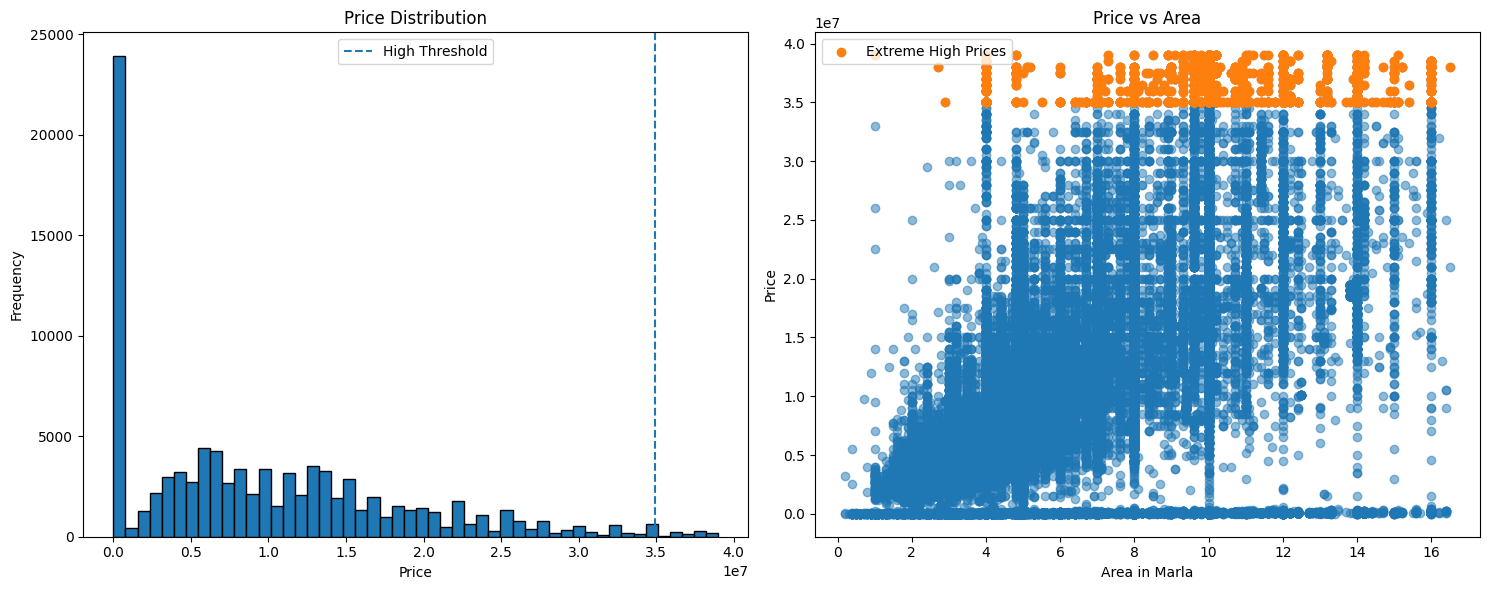

In [47]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="Creating legend with loc=\"best\" can be slow with large amounts of data.")
# Visualize the distribution of high prices
plt.figure(figsize=(15, 6))
# Plot distribution of prices
plt.subplot(1, 2, 1)
plt.hist(df_cleaned['price'], bins=50, edgecolor='black')
plt.axvline(x=high_threshold, linestyle='--', label='High Threshold')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.legend()
# Plot scatter of features vs price
plt.subplot(1, 2, 2)
plt.scatter(df_cleaned['area_in_marla'], df_cleaned['price'], alpha=0.5)
plt.scatter(extremely_high_prices['area_in_marla'], extremely_high_prices['price'], label='Extreme High Prices')
plt.xlabel('Area in Marla')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.legend()
plt.tight_layout()
plt.show()

##### 6.5 Analysis of High-Priced Properties
The analysis reveals that high-priced properties are concentrated in certain property types, larger sizes, and specific locations. Key factors driving these high prices include:

- **Property Type:** Certain property types command higher prices. For example, property type 1 shows the highest average prices.
- **Location:** Properties in more prestigious or central locations tend to have higher prices.
- **Size:** Larger properties, especially those around 10-12 marlas, are associated with higher prices.

It is also notable that all high-priced properties are for sale, indicating a market for investment or high-value residential properties.
Properties with larger areas and located in prime areas tend to command higher prices, reflecting the demand and investment
potential in these high-value segments.

#### 7. Model Building

##### 7.1 Prepare Feature and Target Variables

In [48]:
# Feature and target variable
X = df_cleaned[['latitude', 'longitude', 'baths', 'bedrooms', 'area_in_square_feet', 'house_age','location']]
y = df_cleaned['price']

##### 7.2 Split the Data into Training and Testing Sets

In [49]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### 7.3 Train Models

In [50]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

##### 7.4 Calculate and Compare Model Metrics

Linear Regression Performance:
Mean Squared Error: 48424315241589.945
R² Score: 0.3786870536265593

Random Forest Performance:
Mean Squared Error: 32642152566753.31
R² Score: 0.5811816463270867

XGBoost Performance:
Mean Squared Error: 32201352129592.65
R² Score: 0.5868374109268188



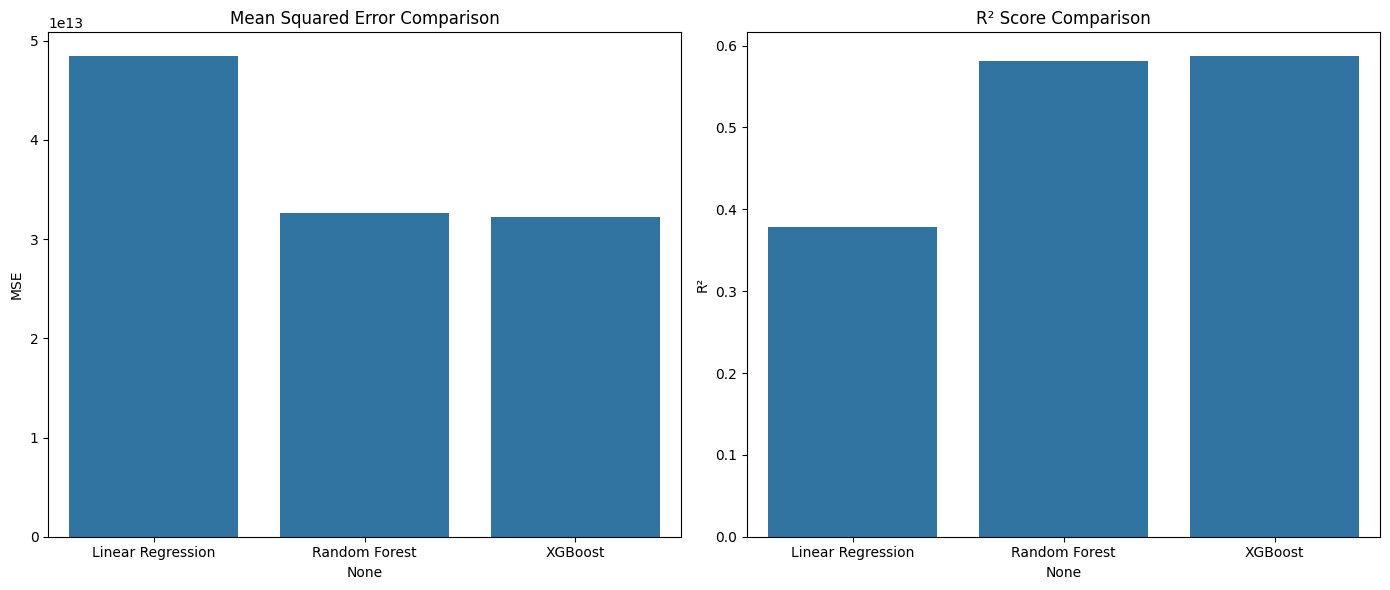

In [51]:
# Function to calculate and print metrics
def calculate_metrics(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} Performance:')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}\n')

    return mse, r2
# Calculate metrics for all models
metrics = {}
metrics['Linear Regression'] = calculate_metrics(y_test, y_pred_lr, 'Linear Regression')
metrics['Random Forest'] = calculate_metrics(y_test, y_pred_rf, 'Random Forest')
metrics['XGBoost'] = calculate_metrics(y_test, y_pred_xgb, 'XGBoost')
# Convert metrics dictionary to DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics, index=['MSE', 'R²']).T
# Plot the metrics for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Plot MSE
sns.barplot(x=metrics_df.index, y=metrics_df['MSE'], ax=axes[0])
axes[0].set_title('Mean Squared Error Comparison')
axes[0].set_ylabel('MSE')
# Plot R²
sns.barplot(x=metrics_df.index, y=metrics_df['R²'], ax=axes[1])
axes[1].set_title('R² Score Comparison')
axes[1].set_ylabel('R²')
plt.tight_layout()
plt.show()


##### 7.5 Plot Actual vs. Predicted Values

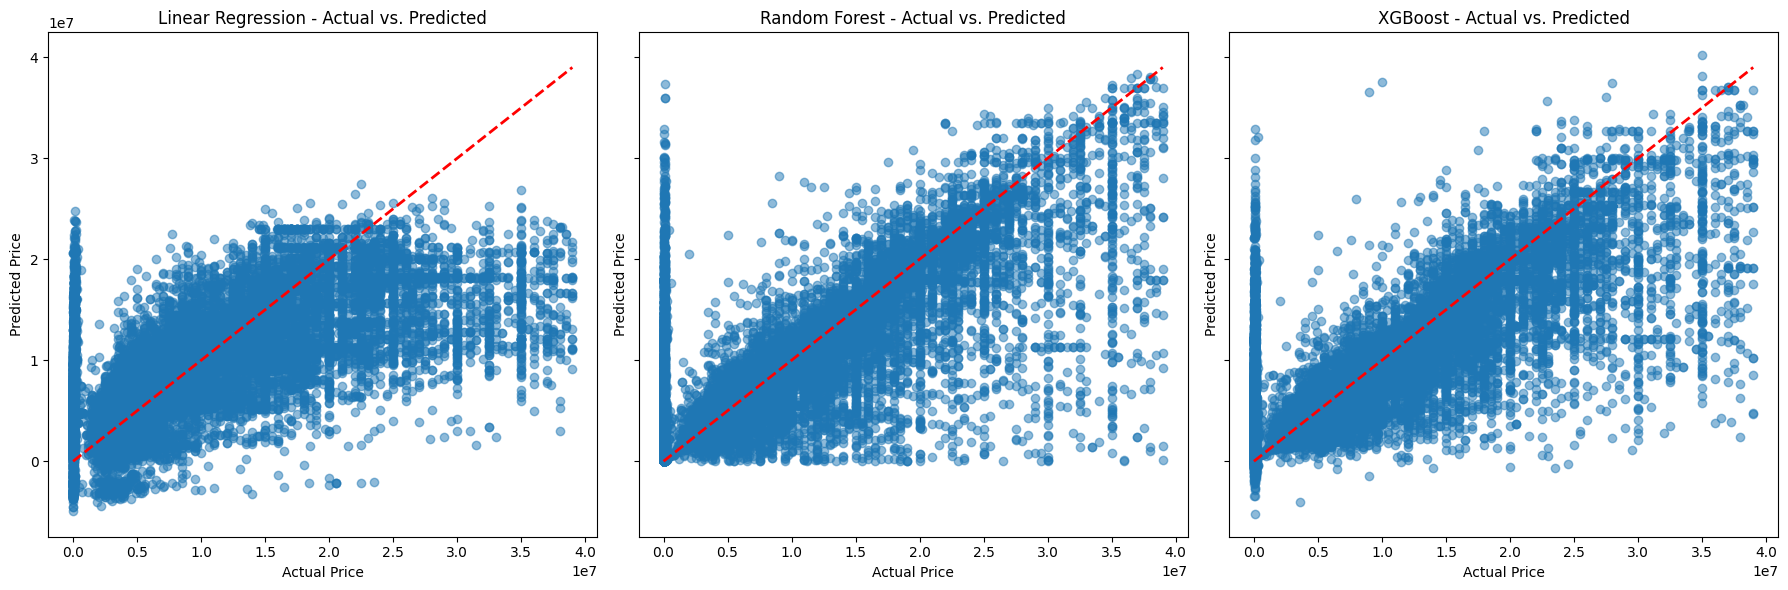

In [52]:
# Function to plot Actual vs. Predicted values
def plot_actual_vs_predicted(y_test, y_pred, model_name, ax):
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_title(f'{model_name} - Actual vs. Predicted')
    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')
# Create a figure and axis for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
# Plot for Linear Regression
plot_actual_vs_predicted(y_test, y_pred_lr, 'Linear Regression', axes[0])
# Plot for Random Forest
plot_actual_vs_predicted(y_test, y_pred_rf, 'Random Forest', axes[1])
# Plot for XGBoost
plot_actual_vs_predicted(y_test, y_pred_xgb, 'XGBoost', axes[2])
plt.tight_layout()
plt.show()

##### 7.6 Preprocess New Data and Make Predictions

In [53]:
# Function to preprocess new data and make predictions
def preprocess_and_predict(new_data):
 # Ensure 'date_added' is in datetime format
    new_data['date_added'] = pd.to_datetime(new_data['date_added']) 
 # Creating a new feature: age of the house
    current_year = pd.Timestamp.now().year
    new_data['house_age'] = current_year - new_data['date_added'].dt.year
 # Selecting features
    X_new = new_data[['latitude', 'longitude', 'baths', 'bedrooms', 'area_in_square_feet', 'house_age', 'location']]
 # Making predictions
    predictions = {
        'Linear Regression': lr_model.predict(X_new),
        'Random Forest': rf_model.predict(X_new),
        'XGBoost': xgb_model.predict(X_new)
 }

    return predictions
# Example of new data
new_data = pd.DataFrame({
    'latitude': [24.8607],
    'longitude': [67.0011],
    'baths': [2],
    'bedrooms': [3],
    'area_in_square_feet': [1361.25],
    'date_added': ['2020-05-21'],
    'location' : [2]
})
# Make predictions for new data
predictions = preprocess_and_predict(new_data)
# Display predictions
for model_name, pred in predictions.items():
    print(f"{model_name} Prediction: {pred[0]}")

Linear Regression Prediction: 8753556.318634674
Random Forest Prediction: 8528045.834270718
XGBoost Prediction: 6356761.0


##### 7.7 Predictions for Different Scenarios

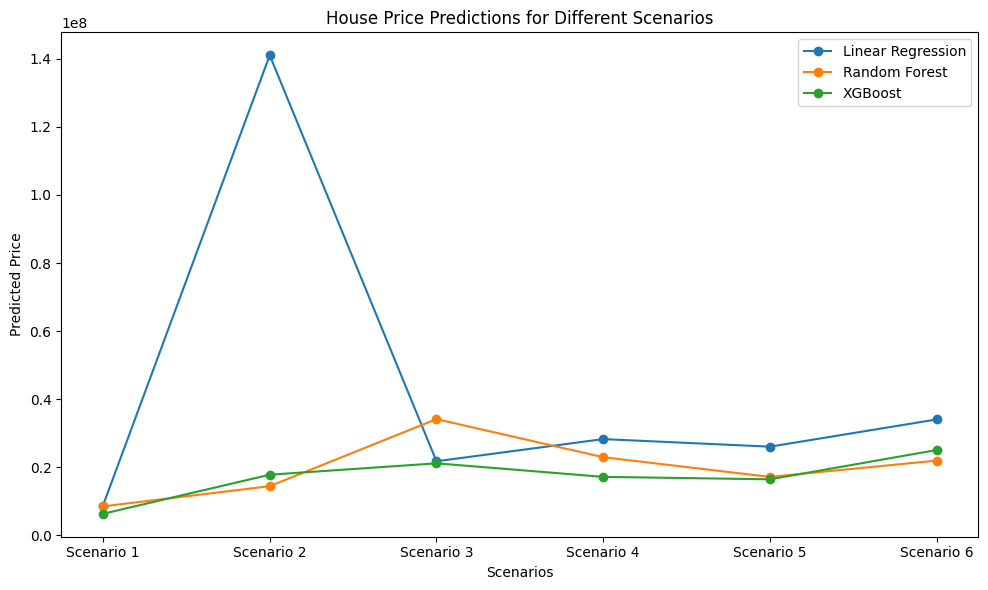

In [56]:
# Example of three different scenarios
scenarios = pd.DataFrame({
    'latitude': [24.8607, 25.0300, 23.8103, 26.2000, 24.8000, 27.0000], # Different latitudes
    'longitude': [67.0011, 67.5000, 68.0000, 68.5000, 67.2000, 69.0000], # Different longitudes
    'baths': [2, 3, 1, 5, 7, 5], # Different number of bathrooms
    'bedrooms': [3, 4, 2, 5, 8, 6], # Different number of bedrooms
    'area_in_square_feet': [1361.25, 71633.50, 8816.75, 6544.50, 3272.25, 8816.75], # Different area sizes
    'date_added': ['2020-05-21', '2021-06-15', '2019-07-10', '2022-01-01', '2018-11-20', '2023-03-15'], # Different
    'location' : [1,4,1,5,3,1]

})
# Make predictions for scenarios
predictions = preprocess_and_predict(scenarios)
# Create a DataFrame for easy plotting
predictions_df = pd.DataFrame(predictions, index=['Scenario 1', 'Scenario 2', 'Scenario 3', 'Scenario 4', 'Scenario 5', 'Scenario 6'])
# Plot predictions for different scenarios
fig, ax = plt.subplots(figsize=(10, 6))
# Plot predictions for each model
for model_name in predictions:
    ax.plot(predictions_df.index, predictions_df[model_name], marker='o', label=model_name)
ax.set_title('House Price Predictions for Different Scenarios')
ax.set_xlabel('Scenarios')
ax.set_ylabel('Predicted Price')
ax.legend()
plt.tight_layout()
plt.show()


#### 8. Conclusion and Summary

In this project, we have successfully built and evaluated several machine learning models for house price prediction. The keyfindings are:

**Best Model:** XGBoost performed the best with the lowest Mean Squared Error (MSE) and the highest R-squared (R²) score,indicating it is the most accurate model among those tested.        
**Insights:** Key features affecting house prices include location, area and property type.

#### 9. Recommendations:

**Model Choice:** Use XGBoost for accurate predictions. Additionally, exploring deep learning models such as neural networkscould provide further improvements in prediction accuracy.          
**Future Improvements:** Consider tuning model parameters, incorporating more features, and experimenting with deep
learning techniques for enhanced performance.        
This project demonstrates the effectiveness of machine learning in predicting house prices and provides a foundation for furtherenhancements in real estate analysis